In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('fire_incident.csv')

In [4]:
data.columns

Index(['Date', 'Time', 'Day_of_Week', 'Barangay', 'Latitude', 'Longitude',
       'Weather', 'Property_Type', 'Fire_Cause', 'Fire_Severity',
       'Casualty_Count', 'Response_Time', 'Fire_Duration'],
      dtype='object')

In [7]:
data.shape

(1000, 13)

In [8]:
X = data.drop('Fire_Cause', axis=1)
y = data['Fire_Cause']

In [10]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [11]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [12]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Casualty_Count', 'Response_Time',
       'Fire_Duration'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Date', 'Time', 'Day_of_Week', 'Barangay', 'Weather', 'Property_Type',
       'Fire_Severity'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [15]:
y_pred = model.predict(X_test)

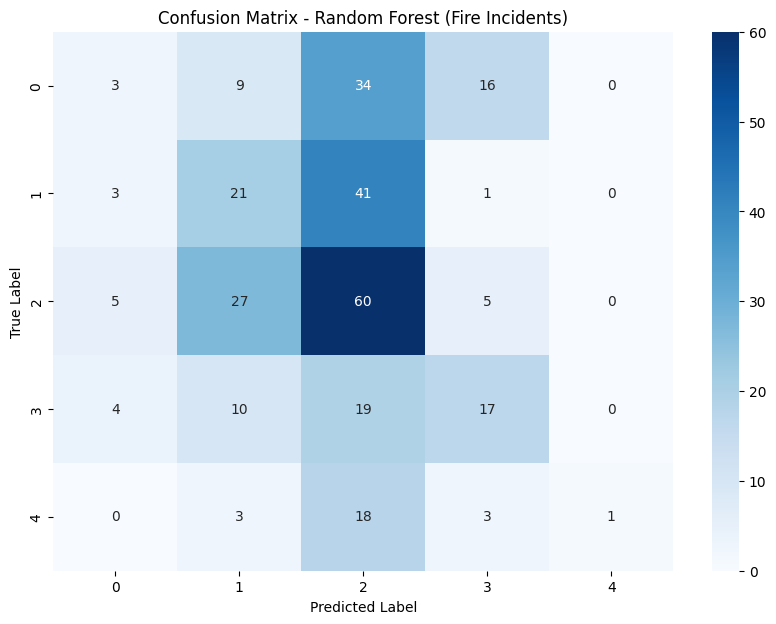

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Fire Incidents)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Arson       0.20      0.05      0.08        62
     Cooking       0.30      0.32      0.31        66
  Electrical       0.35      0.62      0.45        97
     Natural       0.40      0.34      0.37        50
       Other       1.00      0.04      0.08        25

    accuracy                           0.34       300
   macro avg       0.45      0.27      0.26       300
weighted avg       0.37      0.34      0.30       300



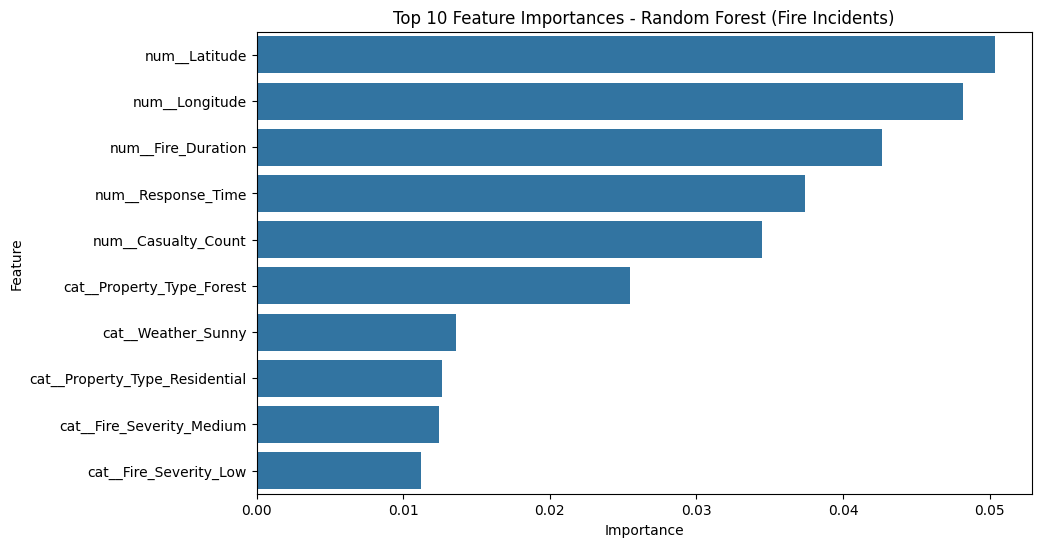

In [20]:
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
importances = model.named_steps['classifier'].feature_importances_
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10))
plt.title('Top 10 Feature Importances - Random Forest (Fire Incidents)')
plt.show()

In [21]:
joblib.dump(model, 'rf_fire_incident.pkl')
print("Model saved as 'rf_fire_incident.pkl'")

Model saved as 'rf_fire_incident.pkl'
